In [1]:
import os
import numpy as np
from PIL import Image
from sifid_score import calculate_sifid_given_paths
import matplotlib.pyplot as plt

In [2]:
def calc_avg_sifid(real_file_path, fake_folder_path):
    score = calculate_sifid_given_paths(real_file_path, 
                                        fake_folder_path,
                                        1,False,64,'jpg')
    return np.array(score)

In [3]:
names = ['birds', 'cows', 'balloons', 'zebra']
total_scale = 6
num_scales = 7
result1 = np.zeros((len(names), num_scales))

for i, name in enumerate(names):
    for scale in range(num_scales):
        print(name, scale)
        real_img_folder = './processed/{}{}/real/'.format(name, total_scale)
        fake_img_folder = './processed/{}{}/gen_start_scale={}/'.format(name, total_scale, scale)
        avg = calc_avg_sifid(real_img_folder, fake_img_folder).mean()
        result1[i][scale] = avg

birds 0
birds 1
birds 2
birds 3
birds 4
birds 5
birds 6
cows 0
cows 1
cows 2
cows 3
cows 4
cows 5
cows 6
balloons 0
balloons 1
balloons 2
balloons 3
balloons 4
balloons 5
balloons 6
zebra 0
zebra 1
zebra 2
zebra 3
zebra 4
zebra 5
zebra 6


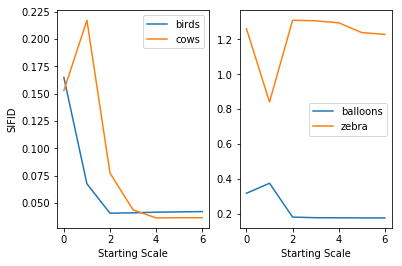

In [4]:

fig, (ax1, ax2) = plt.subplots(1, 2)




ax1.plot(result1[0], label='birds')
ax1.plot(result1[1], label='cows')
ax2.plot(result1[2], label='balloons')
ax2.plot(result1[3], label='zebra')
ax1.set_ylabel('SIFID')
ax1.set_xlabel('Starting Scale')
ax2.set_xlabel('Starting Scale')
ax1.legend()
ax2.legend()

Text(0.5, 0.98, 'The SIFID of different source image with different starting scale')

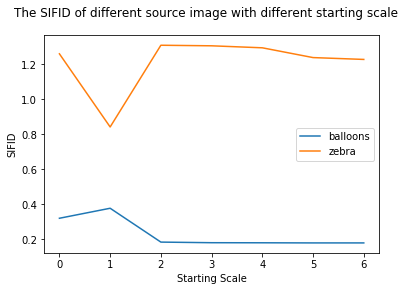

In [5]:
plt.plot(result1[2], label='balloons')
plt.plot(result1[3], label='zebra')
plt.ylabel('SIFID')
plt.xlabel('Starting Scale')
plt.legend()
plt.suptitle('The SIFID of different source image with different starting scale')

In [6]:
names = ['birds', 'cows', 'balloons', 'zebra']
total_scales = [2, 4, 6, 8]
result2 = np.zeros((len(names), len(total_scales)))
for i, name in enumerate(names):
    for j, scale in enumerate(total_scales):
        print(name, scale)
        real_img_folder = './processed/{}{}/real/'.format(name, scale)
        fake_img_folder = './processed/{}{}/gen_start_scale={}/'.format(name, scale, scale)
        avg = calc_avg_sifid(real_img_folder, fake_img_folder).mean()
        result2[i][j] = avg

birds 2
birds 4
birds 6
birds 8
cows 2
cows 4
cows 6
cows 8
balloons 2
balloons 4
balloons 6
balloons 8
zebra 2
zebra 4
zebra 6
zebra 8


Text(0.5, 0, 'Total number of layers')

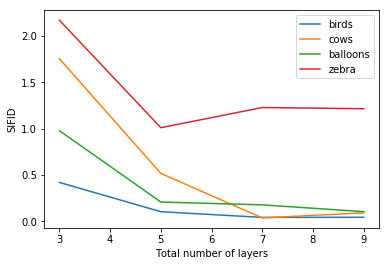

In [13]:
x_labels = [3, 5, 7, 9]
plt.plot(x_labels, result2[0], label='birds')
plt.plot(x_labels, result2[1], label='cows')
plt.plot(x_labels, result2[2], label='balloons')
plt.plot(x_labels, result2[3], label='zebra')
plt.legend()
plt.ylabel('SIFID')
plt.xlabel('Total number of layers')

In [8]:
names = ['birds', 'cows', 'balloons', 'zebra']
# names = ['balloons']
start_scale = 2
cycles = range(1, 21)
result3 = np.zeros((len(names), len(cycles)))
errors = np.zeros((len(names), len(cycles)))
for i, name in enumerate(names):
    for j, cycle in enumerate(cycles):
        print(name, cycle)
        real_img_folder = './processed/{}_cyclic_{}/real/'.format(name, cycle)
        fake_img_folder =  './processed/{}_cyclic_{}/gen_start_scale={}/'.format(name, cycle, start_scale)
        avg = calc_avg_sifid(real_img_folder, fake_img_folder)
        result3[i][j] = avg.mean()


birds 1
birds 2
birds 3
birds 4
birds 5
birds 6
birds 7
birds 8
birds 9
birds 10
birds 11
birds 12
birds 13
birds 14
birds 15
birds 16
birds 17
birds 18
birds 19
birds 20
cows 1
cows 2
cows 3
cows 4
cows 5
cows 6
cows 7
cows 8
cows 9
cows 10
cows 11
cows 12
cows 13
cows 14
cows 15
cows 16
cows 17
cows 18
cows 19
cows 20
balloons 1
balloons 2
balloons 3
balloons 4
balloons 5
balloons 6
balloons 7
balloons 8
balloons 9
balloons 10
balloons 11
balloons 12
balloons 13
balloons 14
balloons 15
balloons 16
balloons 17
balloons 18
balloons 19
balloons 20
zebra 1
zebra 2
zebra 3
zebra 4
zebra 5
zebra 6
zebra 7
zebra 8
zebra 9
zebra 10
zebra 11
zebra 12
zebra 13
zebra 14
zebra 15
zebra 16
zebra 17
zebra 18
zebra 19
zebra 20


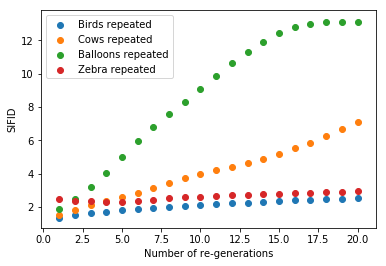

In [9]:
# plt.scatter(range(20), result3[0])
# plt.plot([result2[2][2]] * 20)
# fig, (ax1, ax2) = plt.subplots(1, 2)

# ax1.plot(cycles, [result2[0][2]] * len(cycles), label='Birds original')
# ax1.scatter(cycles, result3[0],  label='Birds repeated')
# ax1.plot(cycles, [result2[1][2]] * len(cycles), label='Cows original')
# ax1.scatter(cycles, result3[1],  label='Cows repeated')
# ax1.set_xlabel('Number of re-generations')
# ax1.set_ylabel('SIFID')




# ax2.plot(cycles, [result2[2][2]] * len(cycles), label='Balloons original')
# ax2.scatter(cycles, result3[2],  label='Balloons repeated')
# ax2.plot(cycles, [result2[3][2]] * len(cycles), label='Zebra original')
# ax2.scatter(cycles, result3[3],  label='Zebra repeated')
# ax2.set_xlabel('Number of re-generations')
# ax2.legend()
# ax1.legend()

# fig, (ax1, ax2) = plt.subplots(1, 2)


plt.scatter(cycles, result3[0],  label='Birds repeated')

plt.scatter(cycles, result3[1],  label='Cows repeated')
plt.xlabel('Number of re-generations')
plt.ylabel('SIFID')





plt.scatter(cycles, result3[2],  label='Balloons repeated')

plt.scatter(cycles, result3[3],  label='Zebra repeated')
# ax2.set_xlabel('Number of re-generations')
# ax2.legend()
plt.legend()

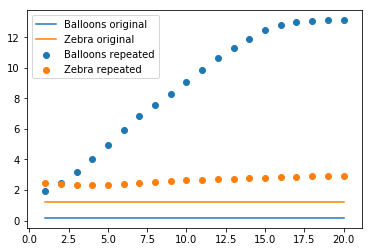

In [10]:
plt.plot(cycles, [result2[2][2]] * len(cycles), label='Balloons original')
plt.scatter(cycles, result3[2],  label='Balloons repeated')
plt.plot(cycles, [result2[3][2]] * len(cycles), label='Zebra original')
plt.scatter(cycles, result3[3],  label='Zebra repeated')
plt.legend()

In [11]:
names = ['birds', 'cows', 'balloons', 'zebra']
start_scale = 6
skips = range(1, 6)
result4 = np.zeros((len(names), len(skips)))

for i, name in enumerate(names):
    for j, skip in enumerate(skips):
        print(name, skip)
        real_img_folder = './processed/{}_skip_{}/real/'.format(name, skip)
        fake_img_folder =  './processed/{}_skip_{}/gen_start_scale={}/'.format(name, skip, start_scale)
        avg = calc_avg_sifid(real_img_folder, fake_img_folder)
        result4[i][j] = avg.mean()


birds 1
birds 2
birds 3
birds 4
birds 5
cows 1
cows 2
cows 3
cows 4
cows 5
balloons 1
balloons 2
balloons 3
balloons 4
balloons 5
zebra 1
zebra 2
zebra 3
zebra 4
zebra 5


Text(0.5, 0, 'Layer skipped')

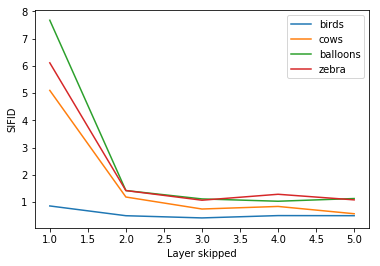

In [12]:
plt.plot(skips, result4[0], label='birds')
plt.plot(skips, result4[1], label='cows')
plt.plot(skips, result4[2], label='balloons')
plt.plot(skips, result4[3], label='zebra')
plt.legend()
plt.ylabel('SIFID')
plt.xlabel('Layer skipped')